In [1]:
import numpy as np
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox import Wind
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from odapi.toolbox import Sun
from odapi.settings import settings
settings.logger.setLevel(40)

In [4]:
sun = Sun()

In [5]:
data = pd.read_pickle("brussels_2012-2016.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

In [6]:
data["timestamp"] = data.index
data["date"] = data["timestamp"].dt.floor('1D')

In [7]:
days = pd.Series(data["date"].unique())
solar = pd.DataFrame(days.apply(sun.solar_day).to_list(), index=days)
solar.sample(5)

,dawn,sunrise,noon,sunset,dusk
2013-08-25 00:00:00+02:00,2013-08-25 04:09:49.479258+00:00,2013-08-25 04:45:47.492176+00:00,2013-08-25 11:44:46+00:00,2013-08-25 18:42:27.401838+00:00,2013-08-25 19:18:13.565873+00:00
2015-07-14 00:00:00+02:00,2015-07-14 03:00:17.244788+00:00,2015-07-14 03:44:57.170105+00:00,2015-07-14 11:48:23+00:00,2015-07-14 19:51:16.315131+00:00,2015-07-14 20:35:42.805667+00:00
2012-07-11 00:00:00+02:00,2012-07-11 02:57:22.256442+00:00,2012-07-11 03:42:29.336587+00:00,2012-07-11 11:48:06+00:00,2012-07-11 19:53:13.826658+00:00,2012-07-11 20:38:08.255365+00:00
2013-07-02 00:00:00+02:00,2013-07-02 02:47:44.618332+00:00,2013-07-02 03:34:19.796628+00:00,2013-07-02 11:46:35+00:00,2013-07-02 19:58:41.143728+00:00,2013-07-02 20:45:08.314572+00:00
2014-01-30 00:00:00+01:00,2014-01-30 06:45:41.044659+00:00,2014-01-30 07:22:13.122083+00:00,2014-01-30 11:55:48+00:00,2014-01-30 16:30:09.572339+00:00,2014-01-30 17:06:44.044184+00:00


In [8]:
data = data.merge(solar, left_on="date", right_index=True)
data.sample(5)

,BC/41N043 (µg/m³),BC/41R001 (µg/m³),BC/41R002 (µg/m³),BC/41R012 (µg/m³),CO/41B004 (mg/m³),CO/41B006 (mg/m³),CO/41B008 (mg/m³),CO/41N043 (mg/m³),CO/41R001 (mg/m³),CO/41R002 (mg/m³),...,WD/41R012 (°G),WS/41R001 (m/s),WS/41R012 (m/s),timestamp,date,dawn,sunrise,noon,sunset,dusk
start,,,,,,,,,,,,,,,,,,,,,
2013-11-09 13:00:00+01:00,NaN,1.360,2.040,0.470,0.130,NaN,0.255,0.180,0.205,0.185,...,NaN,NaN,NaN,2013-11-09 13:00:00+01:00,2013-11-09 00:00:00+01:00,2013-11-09 06:12:15.806448+00:00,2013-11-09 06:48:32.996316+00:00,2013-11-09 11:26:21+00:00,2013-11-09 16:03:38.750013+00:00,2013-11-09 16:39:53.458376+00:00
2014-11-15 21:00:00+01:00,7.395,3.100,4.045,2.080,0.335,0.350,0.535,0.305,0.390,0.335,...,146.0,1.50,2.94,2014-11-15 21:00:00+01:00,2014-11-15 00:00:00+01:00,2014-11-15 06:21:16.552739+00:00,2014-11-15 06:58:18.354478+00:00,2014-11-15 11:27:04+00:00,2014-11-15 15:55:27.341297+00:00,2014-11-15 16:32:27.029597+00:00
2015-11-04 17:00:00+01:00,NaN,NaN,NaN,NaN,0.270,NaN,NaN,0.390,0.295,0.355,...,192.0,3.76,3.66,2015-11-04 17:00:00+01:00,2015-11-04 00:00:00+01:00,2015-11-04 06:03:29.632554+00:00,2015-11-04 06:39:06.866235+00:00,2015-11-04 11:26:07+00:00,2015-11-04 16:12:28.306598+00:00,2015-11-04 16:48:02.681139+00:00
2013-05-08 06:00:00+02:00,NaN,2.900,4.860,1.490,0.285,0.235,0.440,0.455,0.320,0.225,...,NaN,NaN,NaN,2013-05-08 06:00:00+02:00,2013-05-08 00:00:00+02:00,2013-05-08 03:24:49.090092+00:00,2013-05-08 04:04:29.430543+00:00,2013-05-08 11:39:06+00:00,2013-05-08 19:14:40.145927+00:00,2013-05-08 19:54:35.716576+00:00
2013-06-05 18:00:00+02:00,NaN,2.585,1.235,0.875,0.145,0.160,0.495,0.140,0.235,0.150,...,NaN,NaN,NaN,2013-06-05 18:00:00+02:00,2013-06-05 00:00:00+02:00,2013-06-05 02:46:14.971767+00:00,2013-06-05 03:32:02.105625+00:00,2013-06-05 11:41:02+00:00,2013-06-05 19:50:43.211630+00:00,2013-06-05 20:36:40.893566+00:00


In [9]:
def season(x):
    if (x["timestamp"].month >= 4) & (x["timestamp"].month < 10):
        return "Summer"
    else:
        return "Winter"

In [10]:
def week(x):
    if x["timestamp"].dayofweek < 5:
        return "Weekday"
    else:
        return "Weekend"

In [11]:
def working(x):
    if (x["week"] == "Weekday") and ((x["timestamp"].hour >= 8) and (x["timestamp"].hour < 17)):
        return "Working"
    else:
        return "Non-working"

In [12]:
def traffic(x):
    if (x["week"] == "Weekday") and (((x["timestamp"].hour >= 6) and (x["timestamp"].hour < 9)) or ((x["timestamp"].hour >= 16) and (x["timestamp"].hour < 19))):
        return "Traffic"
    else:
        return "Non-Traffic"

In [13]:
def light(x):
    if (x["dawn"] <= x["timestamp"]) and (x["timestamp"] < x["dusk"]):
        return "Day"
    else:
        return "Night"

In [14]:
for key in ["season", "week", "working", "traffic", "light"]:
    function = globals()[key]
    data[key] = data.apply(function, axis=1)

In [15]:
data

,BC/41N043 (µg/m³),BC/41R001 (µg/m³),BC/41R002 (µg/m³),BC/41R012 (µg/m³),CO/41B004 (mg/m³),CO/41B006 (mg/m³),CO/41B008 (mg/m³),CO/41N043 (mg/m³),CO/41R001 (mg/m³),CO/41R002 (mg/m³),...,dawn,sunrise,noon,sunset,dusk,season,week,working,traffic,light
start,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-01-01 07:05:32.002256+00:00,2012-01-01 07:45:28.394570+00:00,2012-01-01 11:45:40+00:00,2012-01-01 15:46:31.104904+00:00,2012-01-01 16:26:28.104316+00:00,Winter,Weekend,Non-working,Non-Traffic,Night
2012-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-01-01 07:05:32.002256+00:00,2012-01-01 07:45:28.394570+00:00,2012-01-01 11:45:40+00:00,2012-01-01 15:46:31.104904+00:00,2012-01-01 16:26:28.104316+00:00,Winter,Weekend,Non-working,Non-Traffic,Night
2012-01-01 02:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-01-01 07:05:32.002256+00:00,2012-01-01 07:45:28.394570+00:00,2012-01-01 11:45:40+00:00,2012-01-01 15:46:31.104904+00:00,2012-01-01 16:26:28.104316+00:00,Winter,Weekend,Non-working,Non-Traffic,Night
2012-01-01 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-01-01 07:05:32.002256+00:00,2012-01-01 07:45:28.394570+00:00,2012-01-01 11:45:40+00:00,2012-01-01 15:46:31.104904+00:00,2012-01-01 16:26:28.104316+00:00,Winter,Weekend,Non-working,Non-Traffic,Night
2012-01-01 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-01-01 07:05:32.002256+00:00,2012-01-01 07:45:28.394570+00:00,2012-01-01 11:45:40+00:00,2012-01-01 15:46:31.104904+00:00,2012-01-01 16:26:28.104316+00:00,Winter,Weekend,Non-working,Non-Traffic,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00+01:00,3.805,1.915,2.695,0.865,0.275,NaN,NaN,0.290,0.305,0.285,...,2015-12-31 07:05:28.484129+00:00,2015-12-31 07:45:28.403049+00:00,2015-12-31 11:45:12+00:00,2015-12-31 15:45:33.615771+00:00,2015-12-31 16:25:34.084052+00:00,Winter,Weekday,Non-working,Non-Traffic,Night
2015-12-31 20:00:00+01:00,3.060,1.640,1.840,0.930,0.305,NaN,NaN,0.275,NaN,0.275,...,2015-12-31 07:05:28.484129+00:00,2015-12-31 07:45:28.403049+00:00,2015-12-31 11:45:12+00:00,2015-12-31 15:45:33.615771+00:00,2015-12-31 16:25:34.084052+00:00,Winter,Weekday,Non-working,Non-Traffic,Night
2015-12-31 21:00:00+01:00,2.580,1.085,1.375,0.515,0.270,NaN,NaN,0.265,NaN,0.200,...,2015-12-31 07:05:28.484129+00:00,2015-12-31 07:45:28.403049+00:00,2015-12-31 11:45:12+00:00,2015-12-31 15:45:33.615771+00:00,2015-12-31 16:25:34.084052+00:00,Winter,Weekday,Non-working,Non-Traffic,Night


In [16]:
client.holidays(2014)

,label,start,tags,stop
0,New Year 2014,2014-01-01 00:00:00+01:00,"[legal, holidays]",2014-01-02 00:00:00+01:00
1,Easter Sunday 2014,2014-04-20 00:00:00+02:00,"[holidays, christian]",2014-04-21 00:00:00+02:00
2,Easter Monday 2014,2014-04-21 00:00:00+02:00,"[legal, holidays, christian]",2014-04-22 00:00:00+02:00
3,Labor Day 2014,2014-05-01 00:00:00+02:00,"[legal, holidays]",2014-05-02 00:00:00+02:00
4,Ascension 2014,2014-05-29 00:00:00+02:00,"[legal, holidays, christian]",2014-05-30 00:00:00+02:00
5,Pentecost Sunday 2014,2014-06-08 00:00:00+02:00,"[holidays, christian]",2014-06-09 00:00:00+02:00
6,Pentecost Monday 2014,2014-06-09 00:00:00+02:00,"[legal, holidays, christian]",2014-06-10 00:00:00+02:00
7,National Day 2014,2014-07-21 00:00:00+02:00,"[legal, holidays]",2014-07-22 00:00:00+02:00
8,Assumption Day 2014,2014-08-15 00:00:00+02:00,"[legal, holidays, christian]",2014-08-16 00:00:00+02:00
9,All Saints Day 2014,2014-11-01 00:00:00+01:00,"[legal, holidays, christian]",2014-11-02 00:00:00+01:00


In [17]:
sns.set_theme(style="ticks", palette="pastel")

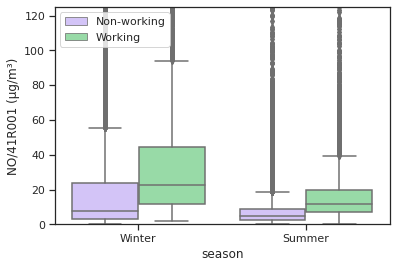

In [20]:
axe = sns.boxplot(
    x="season", y="NO/41R001 (µg/m³)",
    hue="working", palette=["m", "g"],
    data=data
)
axe.set_ylim([0, 125])
axe.legend(loc="upper left")

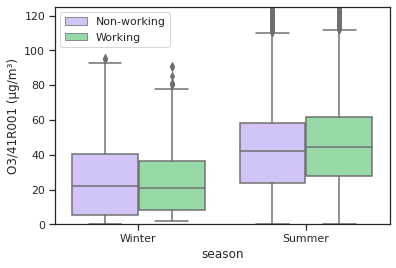

In [21]:
axe = sns.boxplot(
    x="season", y="O3/41R001 (µg/m³)",
    hue="working", palette=["m", "g"],
    data=data
)
axe.set_ylim([0, 125])
axe.legend(loc="upper left")

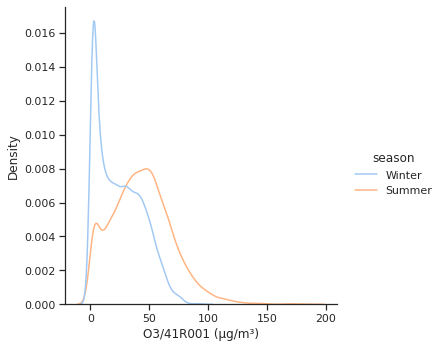

In [23]:
axe = sns.displot(data=data, kind='kde', x='O3/41R001 (µg/m³)', hue='season')

(0.0, 150.0)

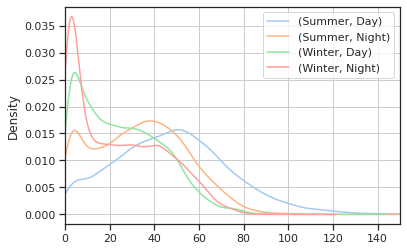

In [32]:
g = data.groupby(["season", "light"])['O3/41R001 (µg/m³)']
axe = g.plot(kind="kde")[0]
axe.grid()
axe.legend()
axe.set_xlim([0, 150])

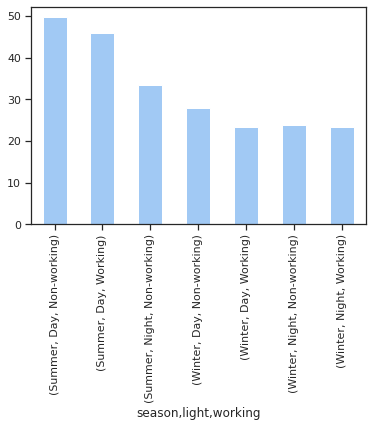

In [46]:
g = data.groupby(["season", "light", "working"])["O3/41R001 (µg/m³)"].mean().plot(kind="bar")